<a href="https://colab.research.google.com/github/erikh22l18/deepLearning_NB/blob/main/Conv_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import urllib.request

In [ ]:
def imshow(img):
  fig, ax = plt.subplots(1, 1, figsize=(8, 8))
  ax.imshow(img)

In [ ]:
path_img = 'https://d.newsweek.com/en/full/1809693/cat-dog.jpg?w=1600&h=1600&q=88&f=117239ddc10e0929372035ef0b425e2e'

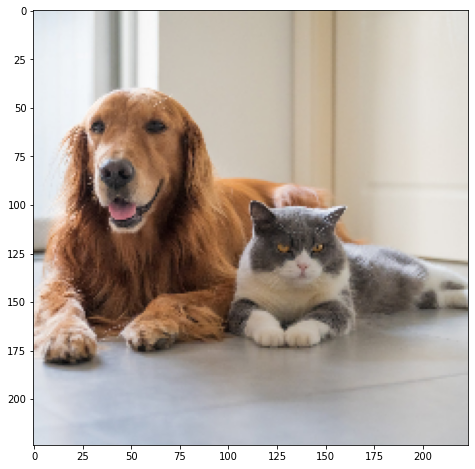

In [ ]:
req = urllib.request.urlopen(path_img)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))

imshow(img)

In [ ]:
model = tf.keras.applications.vgg16.VGG16(weights="imagenet", include_top=True)
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
img_tensor = np.array([img])
img_tensor.shape

(1, 224, 224, 3)

In [ ]:
np.argmax(model.predict(img_tensor))

1/1 [==============================] - 1s 1s/step


216

In [ ]:
!pip install tf_explain
from tf_explain.core.grad_cam import GradCAM

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


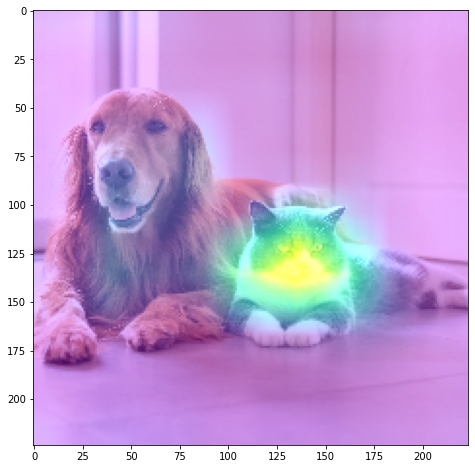

In [ ]:
data = ([img], None)
predict_class_index=281
explainer = GradCAM()

heatMap = explainer.explain(data, model, class_index=predict_class_index, layer_name="block5_conv3")

imshow(heatMap)
